# Begin Milestone 1 with a 250-500-word narrative describing your original idea for the analysis/model building business problem.  
## Clearly identify the problem you will address and the target for your model.  

### Background: In US politics, a Campaign Management company oversees all aspects of a candidate’s political campaign, including campaign strategy, budget, staff hiring and training, fundraising, advertising, adherence to campaign finance laws, and liaising with various campaign team members. Campaign Management companies serve the candidate almost exclusively, where the Campaign Manager reports directly to the candidate and runs the campaign with the candidate’s missions, vision and values in mind.  

### Problem: CampaignMe is a US Campaign Management company that uses data to help get candidates into office. To run a successful campaign, avoid the problem of an unsuccessful campaign, and to ensure successful office election, CampaignMe will gather and analyze prior negative candidate history, including resignation history in past offices held. CampaignMe is looking to take on candidates with the highest probability of winning elections, and devise strategies to ensure that they will get elected.  

### Original Idea: To ensure a successful candidate campaign and election into office at any US government level, an analysis of each CampaignMe candidate's profile needs to be completed. In this specific analysis, CampaignMe will look at past US Congressional resignations. In some cases, resignation reasons are benign (e.g., being elected into a higher office), while others are more negative and illegal in nature (e.g., sexual harassment). A playbook for developing and executing a successful campaign will then be created and will be derived based off a created statistical model to help a potential candidate to get elected.

### Target for model: The model target is past candidate resigation reasons and their sentiments (positive/neutral or negative) 

### Dataset: The dataset used is a Congressional Resignation dataset of 615 members of Congress who resigned or were removed from office from March 4, 1901 (the first day of the 57th Congress) through January 15, 2018, including the resigning member’s party and district, the date they resigned, the reason for their resignation and the source of the information about their resignation. https://www.kaggle.com/yamqwe/congressional-resignationse 


# Then, do a graphical analysis creating a minimum of four graphs.  
## Label your graphs appropriately and explain/analyze the information provided by each graph.  

In [132]:
#import libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [133]:
#load the Congressional data into a dataframe
df = pd.read_csv('congressional_resignations.csv') 
df.head(5)

,Member,Party,District,Congress,Resignation Date,Reason,Source,Category
0,Pat Tiberi,R,OH-12,115th,1/15/2018,Took a job with the Ohio Business Roundtable,New York Times,D
1,Al Franken,D,MN-SEN,115th,1/2/2018,Sexual harassment/groping/unwanted kissing,Minneapolis Star Tribune,X
2,Trent Franks,R,AZ-08,115th,12/8/2017,Sexual harassment/surrogacy pressure,CNN,X
3,John Conyers,D,MI-13,115th,12/5/2017,Sexual harassment/inappropriate touching,Washington Post,X
4,Tim Murphy,R,PA-18,115th,10/21/2017,Extramarital affair/abortion hypocrisy,POLITICO,A


Text(0.5, 1.0, 'US Political Party Distribution')

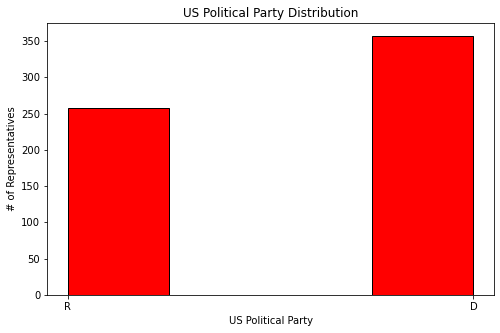

In [134]:
# Visualization 1: Histogram of US Political Party Affiliation
fig, ax = plt.subplots(figsize=(8, 5))
plt.hist(df['Party'], bins=4, color='red', edgecolor='black')
plt.xlabel('US Political Party')
plt.ylabel('# of Representatives')
plt.title('US Political Party Distribution')

Text(0.5, 1.0, 'US Representative Resigation Reason Distribution')

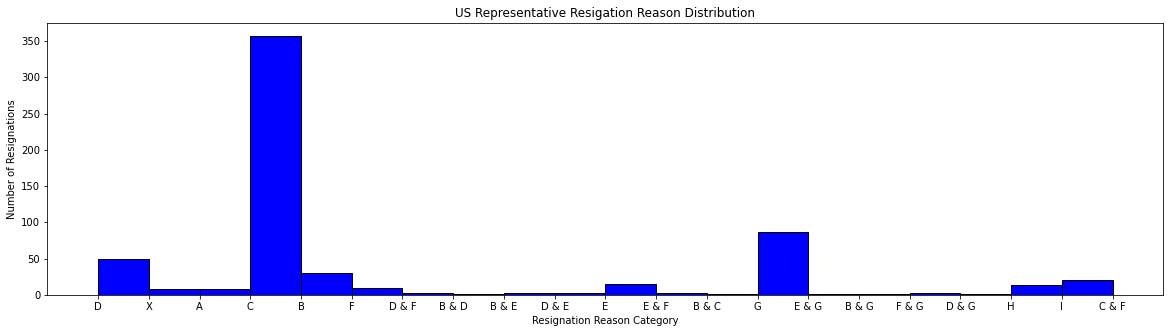

In [140]:
# Visualization 2: Bar graph of Resignation Reason Categories 
fig, ax = plt.subplots(figsize=(20, 5))
plt.hist(df['Category'], bins=20, color='blue', edgecolor='black')
plt.xlabel('Resignation Reason Category' )
plt.ylabel('Number of Resignations')
plt.title('US Representative Resigation Reason Distribution') 

<Figure size 1440x720 with 0 Axes>

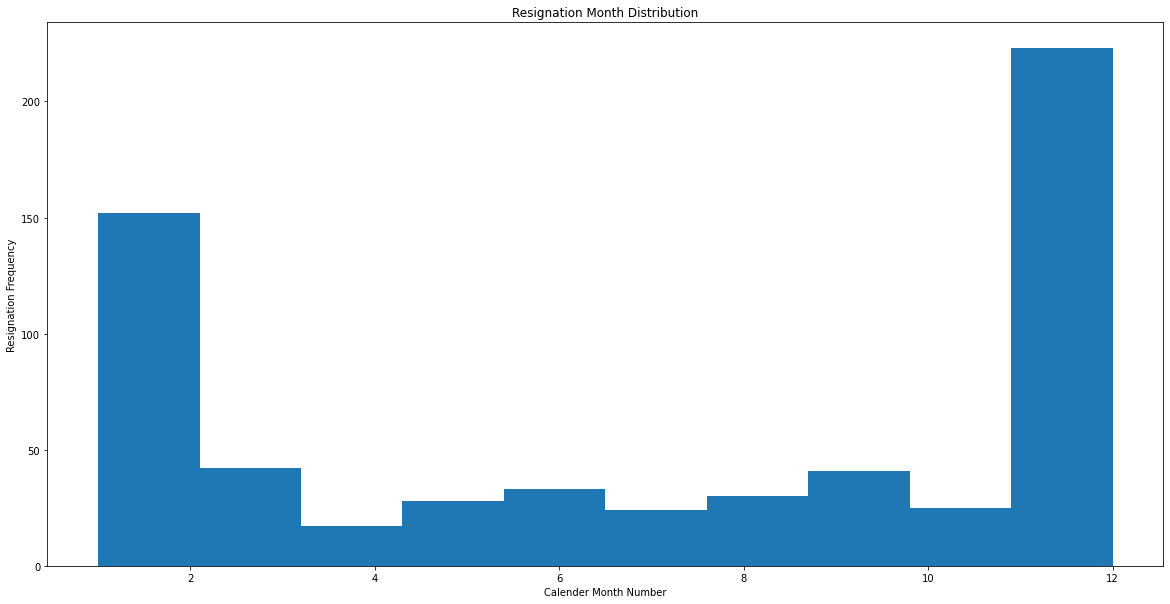

In [141]:
# Visualization 3: Resignation Data Histogram
df['Resignation Date'] = pd.to_datetime(df['Resignation Date'], infer_datetime_format=True)

plt.clf()
fig, ax = plt.subplots(figsize=(20, 10))
df['Resignation Date'].map(lambda d: d.month).plot(kind='hist')
plt.xlabel('Calender Month Number')
plt.ylabel('Resignation Frequency')
plt.title('Resignation Month Distribution')
plt.show()

In [126]:
# Visualization 4: Word Cloud

# install and import wordcloud library
! pip install wordcloud
import wordcloud

In [142]:
# Create text variable from Reasons column
text = df["Reason"]

In [143]:
# Import word cloud to visualize and create wordcloud variable while converting the text variable to a string
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
wordcloud=WordCloud().generate(str(text))

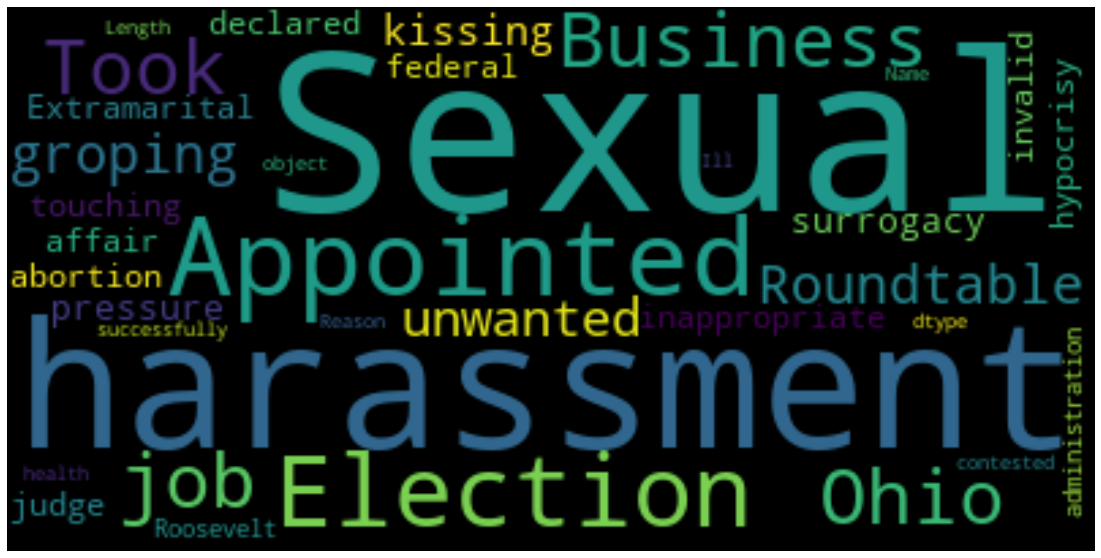

In [144]:
# Visualize the word cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Your analysis should begin to answer the question(s) you are addressing. Write a short overview/conclusion of the insights gained from your graphical analysis. 

## Overview/Findings: 

## Visualization 1: Histogram of US Political Party Affiliation
#### Most of the senators in the Congressional resignation dataset are a part of the Democratic party (350 vs 250 Republicans)
## Visualization 2: Bar graph of Resignation Reason Categories 
### The reason most likey to have resigned are as follows: 
#### 1. Appointed or Elected to a different role in Government (C)
#### 2. Retired, lost reelection bid, appointment was expiring (G)
#### 3. Took a role outside of government (D) 
#### 4. Ethics or curruption issues (B)
#### 5. Their election was successfully contested and overturned (I)
## Visualization 3: Resignation Data Histogram 
#### Most of the Congressional resignations happen in either January or December
## Visualization 4: Word Cloud
#### The bigger the words in the cloud, the more often they are seen in the dataframe column. So, in this case, Sexual, Appointed, Harrassment and Election are the most common words found in the Reason column. Although this Word Cloud is very useful, this is out of alignment with the findings from Visualization #2 (Ethics Issues including sexual harassment being the 4th most common instead of most common), so in subsequent analyses we will look specifically at the Reason column as target variable to understand this better